In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

%matplotlib inline


In [34]:
# Load your data
train_df = pd.read_csv('cleaned_train.csv') 

In [35]:
# Prepare data
X = train_df.drop(['Survived', 'PassengerId', 'Name', 'Ticket'], axis=1)
y = train_df['Survived']

#Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
log_reg_preds = log_reg.predict(X_val)

# Decision Trees
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree_preds = tree.predict(X_val)

In [37]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [38]:
!pip install xgboost

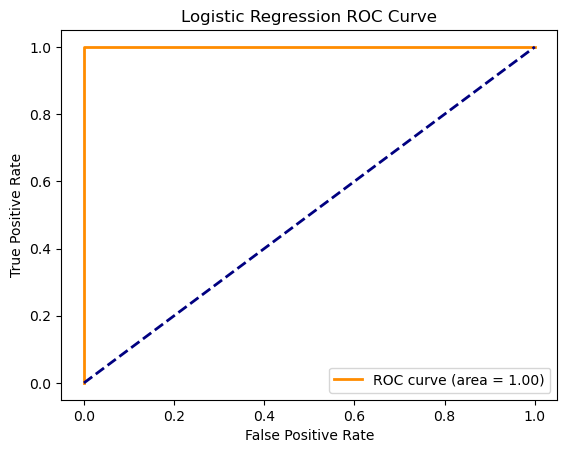

In [43]:
# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_scores = model.predict_proba(X_val)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_val, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [45]:
# Function to plot confusion matrix
def plot_conf_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title('Confusion Matrix for ' + model_name)
    plt.show()

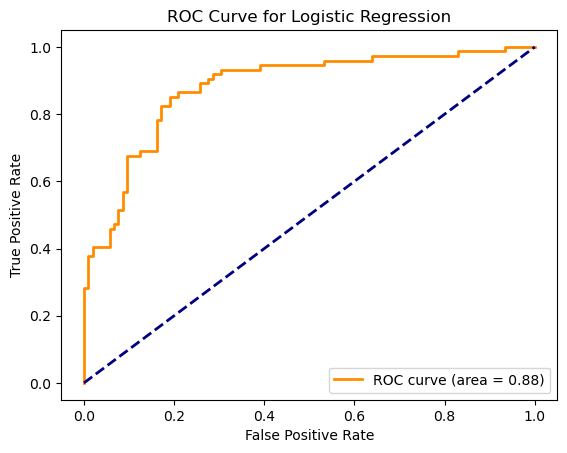

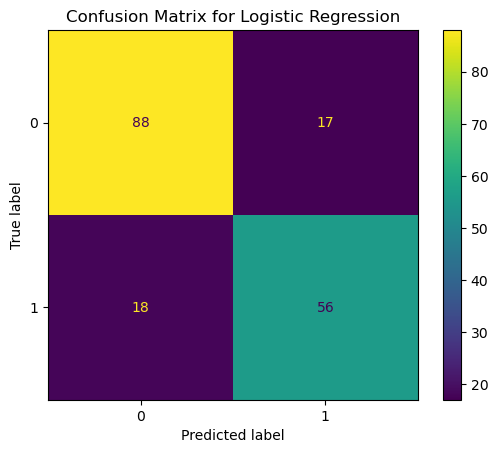

In [29]:
# Plot for Logistic Regression
plot_roc_curve(y_val, log_reg.predict_proba(X_val)[:, 1], 'Logistic Regression')
plot_conf_matrix(y_val, log_reg_preds, 'Logistic Regression')

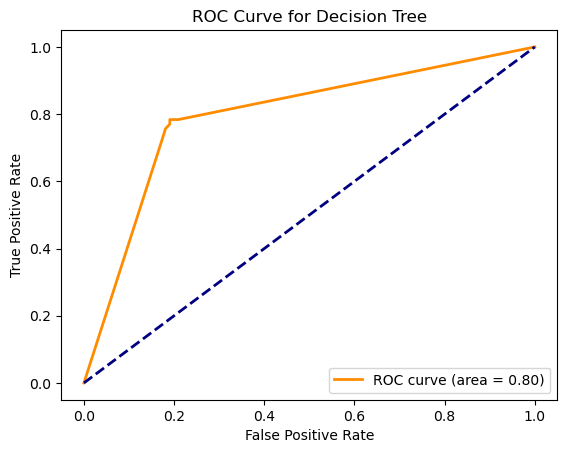

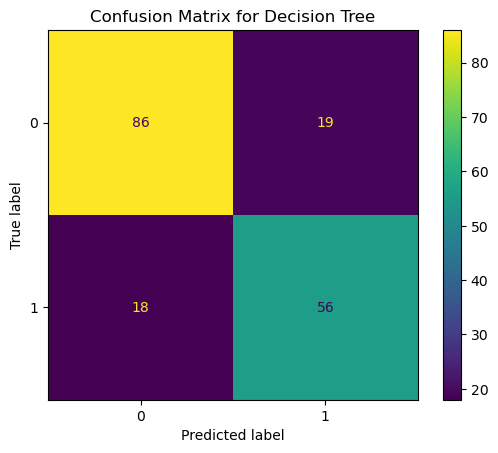

In [30]:
# Plot for Decision Tree
plot_roc_curve(y_val, tree.predict_proba(X_val)[:, 1], 'Decision Tree')
plot_conf_matrix(y_val, tree_preds, 'Decision Tree')

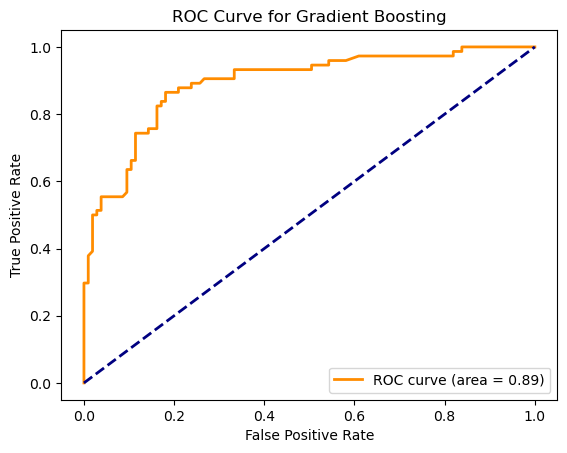

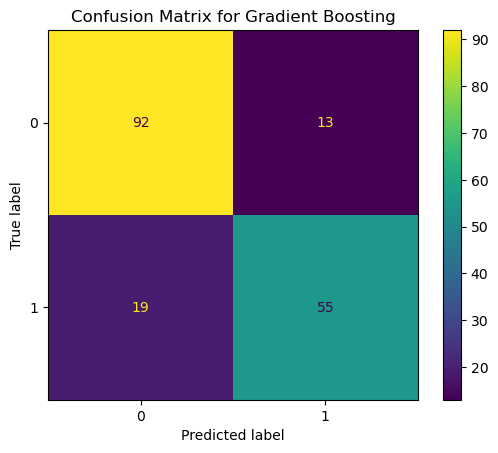

/Users/melbrum/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [12:15:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


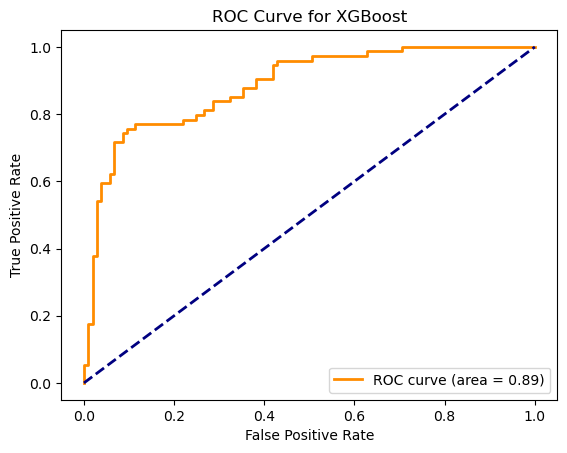

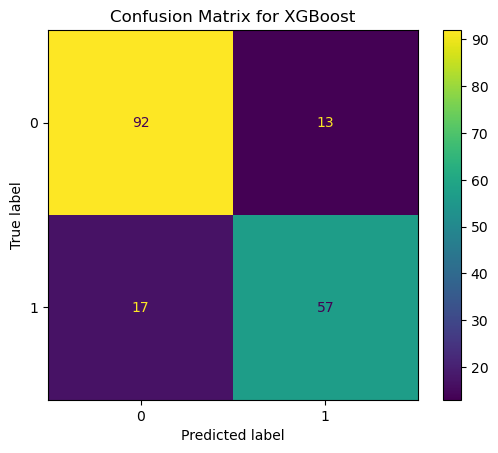

In [32]:
# Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_preds = gb.predict(X_val)
plot_roc_curve(y_val, gb.predict_proba(X_val)[:, 1], 'Gradient Boosting')
plot_conf_matrix(y_val, gb_preds, 'Gradient Boosting')

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_val)
plot_roc_curve(y_val, xgb.predict_proba(X_val)[:, 1], 'XGBoost')
plot_conf_matrix(y_val, xgb_preds, 'XGBoost')

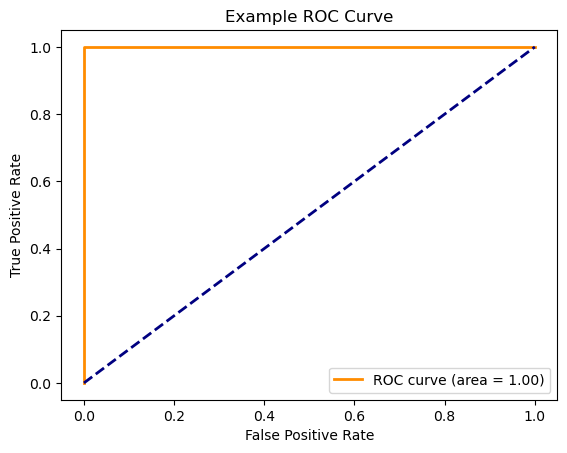